 source link : https://datamillnorth.org/dataset/customer-meter-data

 local area study dataset link :
 https://datamillnorth.org/dataset/yorkshire-water-daily-customer-meter-data--local-area-
 https://datamillnorth.org/download/yorkshire-water-daily-customer-meter-data--local-area-/fb01ce66-423a-4111-9065-d989bdf0b3ce/Daily%20m3%201315.csv

In [17]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = "https://datamillnorth.org/download/customer-meter-data/b9f2cc02-3fe2-42ae-8470-b2e5d96af712/201415%20YW%20Customer%20Meter%20Data.csv"
df2 = pd.read_csv(url)
df=df2

GROSS_COMSUMPTION - (READING_END_READING)-(READING_START_READING).  One unit = 1m3 (1000 litres)

In [16]:
df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485511 entries, 0 to 2485510
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   POSTAL_TOWN                object 
 1   POSTCODE_OUTCODE           object 
 2   PROPERTY_CLASS             object 
 3   METER_KEY                  int64  
 4   READING_START_DATE         object 
 5   READING_END_DATE           object 
 6   READING_START_READING      float64
 7   READING_END_READING        float64
 8   GROSS_CONSUMPTION          int64  
 9   DAILY_AVERAGE_CONSUMPTION  float64
 10  READING_SOURCE             object 
 11  CUSTOMER_TYPE              object 
 12  BILLPAYER_AGE              object 
 13  CURRENT_OCCUPANCY_AGE      float64
dtypes: float64(4), int64(2), object(8)
memory usage: 265.5+ MB


# deeper data understanding

In [ ]:
df['READING_SOURCE'].unique()


In [ ]:
df['POSTAL_TOWN'].unique()

In [ ]:
df['PROPERTY_CLASS'].unique()

In [ ]:
df['BILLPAYER_AGE'].unique()

In [ ]:
df['CUSTOMER_TYPE'].unique()

In [ ]:
# df[df["CUSTOMER_TYPE"]==" "] = "I/A"
df['CUSTOMER_TYPE'].unique()

In [ ]:
sns.catplot( x="BILLPAYER_AGE", kind="count", data=df.sort_values(by=['BILLPAYER_AGE']))


In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.catplot( x="POSTAL_TOWN", kind="count", data=df)

# Towns on the map

In [ ]:
from geopy.geocoders import Nominatim, GoogleV3


In [ ]:

df2 = df.groupby(['POSTAL_TOWN'])["GROSS_CONSUMPTION"].mean().reset_index(name="total average gross consumption")
df2

In [ ]:
geolocator = Nominatim(user_agent="example")
L1=[] #lat
L2=[] #lon
L3=[] #name
for i in range (len(df2)) :
    data = geolocator.geocode(df2['POSTAL_TOWN'].loc[df2.index[i]])
    data.raw.get("lat"), data.raw.get("lon")
    L1.append(data.raw.get("lat"))
    L2.append(data.raw.get("lon"))
    L3.append(df2['POSTAL_TOWN'].loc[df2.index[i]])

In [ ]:
# import the library
import folium
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
# Show the map
m
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':L2,
   'lat':L1,
   'name':L3,
   'value':df2['total average gross consumption']
}, dtype=str)


In [ ]:
# add marker one by one on the map
for i in range(len(df2)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)
m
# Show the map again

some city seem to have the same name as some cities in the us and canada.

# some encoding

obj_df = dataframe containing only object values
data = main data frame where object values were encoded to numeric values

In [20]:
# obj_df = df.select_dtypes(include=['object']).copy()
# obj_df.head()

In [21]:
# obj_df[obj_df.isnull().any(axis=1)]


fill nan values with the most frequent value

In [24]:
# #obj_df["POSTAL_TOWN"].value_counts()
# obj_df = obj_df.fillna({"POSTAL_TOWN": "Leeds"},inplace=True)
# obj_df = obj_df.fillna({"BILLPAYER_AGE": "16-30"},inplace=True)
# obj_df = obj_df.fillna({"PROPERTY_CLASS": "All new Domestic Properties"},inplace=True)
# obj_df = obj_df.fillna({"CUSTOMER_TYPE": "I/A"},inplace=True)



In [28]:
 data=df
data.fillna({"POSTAL_TOWN": "Leeds"},inplace=True)
data.fillna({"BILLPAYER_AGE": "16-30"},inplace=True)
data.fillna({"PROPERTY_CLASS": "All new Domestic Properties"},inplace=True)
data.fillna({"CUSTOMER_TYPE": "I/A"},inplace=True)


In [31]:
dic={i:j for i,j in zip(data["POSTAL_TOWN"].unique(),range(68)) }

In [32]:
cleanup_nums = {"CUSTOMER_TYPE":     {" ": 0, "I": 1, "A":2, 'I/A':3 },
                "BILLPAYER_AGE": {"16-30": 25, "31-40": 35, "41-50":45, "51-60": 55,
                                  "61-70": 65, "71-80": 75,"81+": 85 },
                "PROPERTY_CLASS": {"All new Domestic Properties":1 , "House RV <75": 2, 
                                  "House RV 76-99":3, "House RV 100-124":4, "House RV 125-149":5, 
                                  "House RV 150-399":6, "House RV >400":7 },
                "READING_SOURCE": {"Actual Automated Meter Reading": 1,"Normal reading":2,
                                  "Customer's own reading": 3,"Reading confirmed as correct":4,
                                  "Reading high consumption customer not informed":5, "Reading customer has left":6,
                                  "Reading low consumption customer not informed":7,"Radio unit fitted":8, 
                                  "Reading low consumption customer informed":9}
                ,
                "POSTAL_TOWN":dic
               }


In [33]:
data.replace(cleanup_nums,inplace=True)
data.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,0,NaN,1,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,1,0,25,5.0
1,0,NaN,1,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,1,0,25,0.0
2,0,,1,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,1,0,25,8.0
3,0,,1,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,1,0,25,8.0
4,0,,4,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,1,0,85,7.0


In [34]:
pd.to_datetime(df["READING_START_DATE"])
pd.to_datetime(df["READING_END_DATE"])
df["READING_START_DATE"]=pd.to_datetime(df["READING_START_DATE"])
df["READING_END_DATE"]=pd.to_datetime(df["READING_END_DATE"])


In [35]:
pd.to_datetime(data["READING_START_DATE"])
pd.to_datetime(data["READING_END_DATE"])
data["READING_START_DATE"]=pd.to_datetime(data["READING_START_DATE"])
data["READING_END_DATE"]=pd.to_datetime(data["READING_END_DATE"])


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485511 entries, 0 to 2485510
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   POSTAL_TOWN                int64         
 1   POSTCODE_OUTCODE           object        
 2   PROPERTY_CLASS             int64         
 3   METER_KEY                  int64         
 4   READING_START_DATE         datetime64[ns]
 5   READING_END_DATE           datetime64[ns]
 6   READING_START_READING      float64       
 7   READING_END_READING        float64       
 8   GROSS_CONSUMPTION          int64         
 9   DAILY_AVERAGE_CONSUMPTION  float64       
 10  READING_SOURCE             object        
 11  CUSTOMER_TYPE              int64         
 12  BILLPAYER_AGE              int64         
 13  CURRENT_OCCUPANCY_AGE      float64       
dtypes: datetime64[ns](2), float64(4), int64(6), object(2)
memory usage: 265.5+ MB


# one-hot encoding of customer type

In [41]:
from sklearn.preprocessing import OneHotEncoder
onehot = data
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = oh_encoder.fit_transform(onehot[["CUSTOMER_TYPE"]])
df_enc = pd.DataFrame(encoded_cols, columns=data["CUSTOMER_TYPE"].unique())
df_oh = onehot.join(df_enc)
df_oh.drop(columns=["CUSTOMER_TYPE","POSTCODE_OUTCODE"],inplace=True)
df_oh.rename(columns={0: "customer_type0", 1: "customer_type1", 2: "customer_type2",3: "customer_type3"},inplace=True)
df_oh


,POSTAL_TOWN,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE,customer_type0,customer_type3,customer_type2,customer_type1
0,0,1,1012229,2014-06-27,2014-08-09,339.0,345.0,6,0.081,1,25,5.0,1.0,0.0,0.0,0.0
1,0,1,1012229,2014-06-12,2015-09-03,360.0,386.0,26,0.277,1,25,0.0,1.0,0.0,0.0,0.0
2,0,1,755928,2014-11-02,2014-04-29,2678.0,2716.0,38,0.487,1,25,8.0,1.0,0.0,0.0,0.0
3,0,1,755928,2014-09-08,2014-10-11,2768.0,2845.0,77,0.819,1,25,8.0,1.0,0.0,0.0,0.0
4,0,4,882360,2014-01-25,2014-04-24,98.0,102.0,4,0.044,1,85,7.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485506,0,1,1260079,2015-01-29,2015-01-29,0.0,0.0,0,0.000,2,25,0.0,1.0,0.0,0.0,0.0
2485507,0,1,1260079,2015-01-29,2015-10-03,0.0,0.0,0,0.000,2,25,0.0,1.0,0.0,0.0,0.0
2485508,0,1,1260079,2015-10-03,2015-03-25,0.0,1.0,1,0.063,1,25,0.0,1.0,0.0,0.0,0.0
2485509,0,1,388182,2014-01-24,2014-10-04,582.0,609.0,27,0.351,1,35,7.0,1.0,0.0,0.0,0.0


# converting dataframe into a timeseries

In [42]:
data2 = df_oh

In [43]:
data2.set_index('READING_START_DATE',inplace= True)

#PLOTs

<AxesSubplot:xlabel='POSTAL_TOWN', ylabel='DAILY_AVERAGE_CONSUMPTION'>

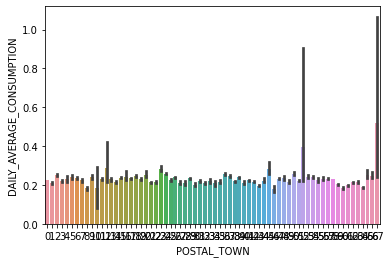

In [46]:
sns.barplot(x='POSTAL_TOWN',y='DAILY_AVERAGE_CONSUMPTION',data=data2)

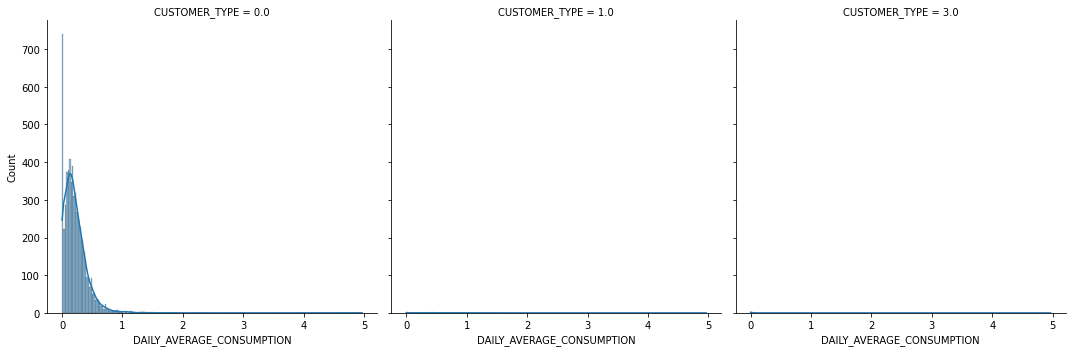

In [47]:
sns.displot(data=data.sample(6000), x=df["DAILY_AVERAGE_CONSUMPTION"], col="CUSTOMER_TYPE", kde=True)

# Data of a single Meter


In [49]:
meter_df=data2[data2["METER_KEY"]== 932948]
meter_df

,POSTAL_TOWN,PROPERTY_CLASS,METER_KEY,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE,customer_type0,customer_type3,customer_type2,customer_type1
READING_START_DATE,,,,,,,,,,,,,,,
2014-10-02,0,1,932948,2014-05-14,352.0,360.0,8,0.085,1,25,1.0,1.0,0.0,0.0,0.0
2014-10-02,0,1,932948,2014-05-14,352.0,360.0,8,0.085,1,35,1.0,1.0,0.0,0.0,0.0
2014-10-02,0,1,932948,2014-05-14,352.0,360.0,8,0.085,1,25,1.0,1.0,0.0,0.0,0.0
2014-05-14,0,1,932948,2014-07-21,360.0,366.0,6,0.087,3,25,1.0,1.0,0.0,0.0,0.0
2014-05-14,0,1,932948,2014-07-21,360.0,366.0,6,0.087,3,25,1.0,1.0,0.0,0.0,0.0
2014-05-14,0,1,932948,2014-07-21,360.0,366.0,6,0.087,3,35,1.0,1.0,0.0,0.0,0.0
2014-07-22,0,1,932948,2014-07-22,366.0,366.0,0,0.000,3,25,0.0,1.0,0.0,0.0,0.0
2014-07-22,0,1,932948,2014-07-22,366.0,366.0,0,0.000,3,35,0.0,1.0,0.0,0.0,0.0
2014-07-22,0,1,932948,2014-07-22,366.0,366.0,0,0.000,3,25,0.0,1.0,0.0,0.0,0.0


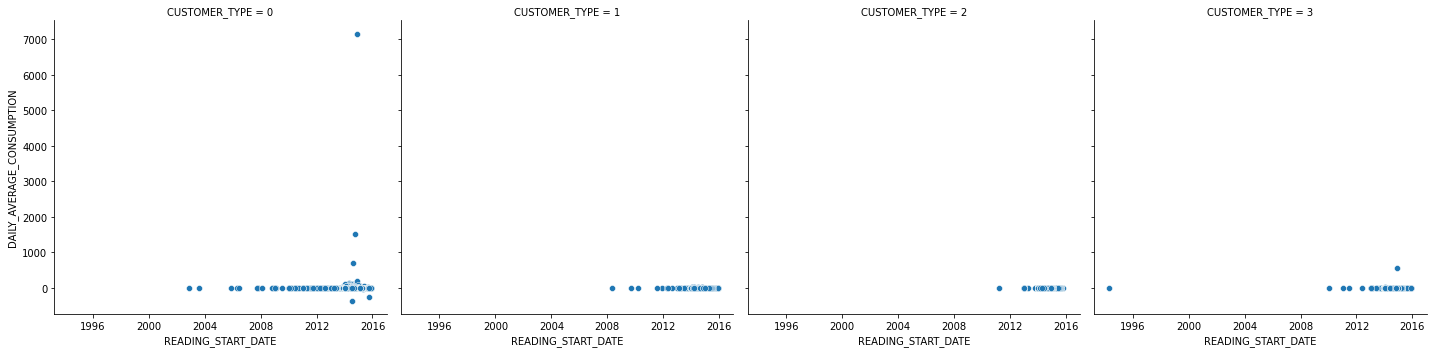

In [54]:
sns.relplot(
    data=data,
    x="READING_START_DATE", y="DAILY_AVERAGE_CONSUMPTION", col="CUSTOMER_TYPE",
)

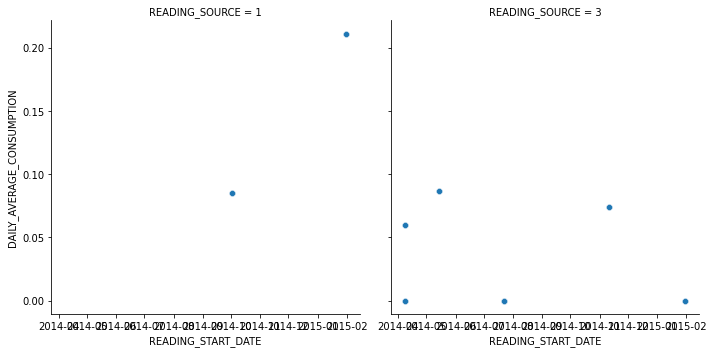

In [53]:
sns.relplot(
    data=meter_df,
    x="READING_START_DATE", y="DAILY_AVERAGE_CONSUMPTION", col="READING_SOURCE",
)

<AxesSubplot:>

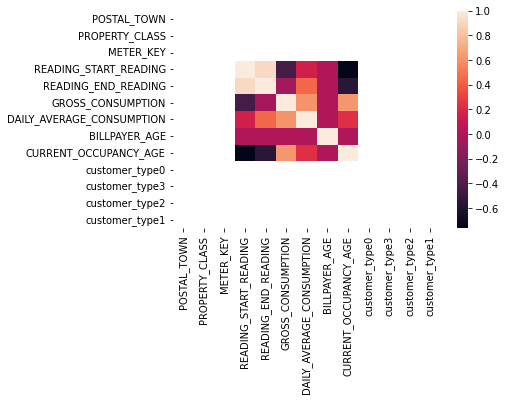

In [55]:
sns.heatmap(meter_df.corr())

# Building and fitting the Model


# importing libraries

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Auto Time series Model

In [64]:
#!pip install auto-ts
#!pip install autots
!pip install auto_ts
!pip install fbprophet
!pip install pystan==2.19.1.1 prophet
import fbprophet
from auto_ts import auto_timeseries
from fbprophet import Prophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9434855 sha256=2724f36c13d7f98377b6fe08e9d8bd76a2e25e26451ebe253dcb2ed154456a3a
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.
  Using cached cmdstanpy-1.0.7-py3-none-any.whl (80 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 

Imported auto_timeseries version:0.0.68. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# model 1

In [65]:
x_train, x_test, y_train, y_test = train_test_split(data["READING_START_DATE"], data["GROSS_CONSUMPTION"], test_size = 0.2, random_state = 100)
train, test = train_test_split(meter_df, test_size=0.2)


Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (21, 15)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Alert! Data is not stationary even after two differencing. Continuing...
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophe

TypeError: 'NoneType' object is not subscriptable

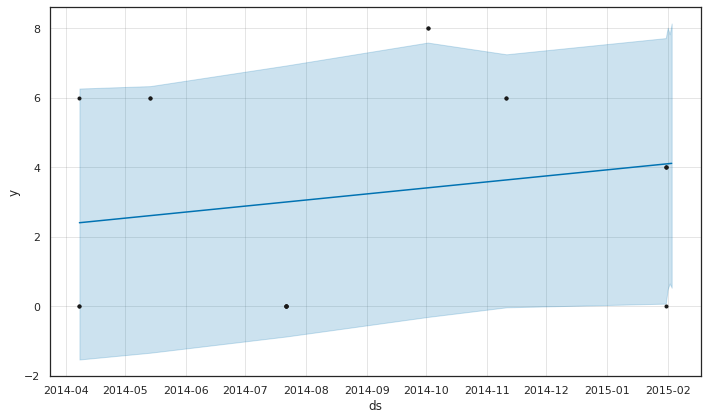

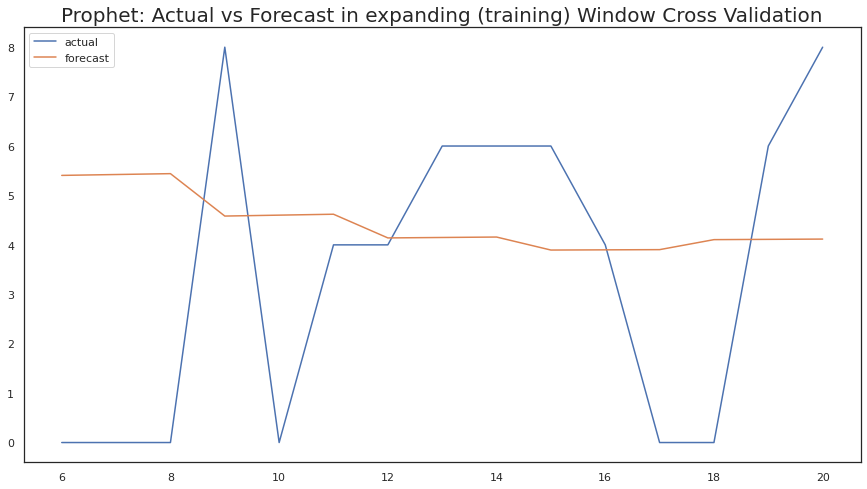

<Figure size 1080x576 with 0 Axes>

In [66]:
model =auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='D',
                        model_type='best')
model.fit(traindata= train, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")
future_predictions = model.predict(testdata=61)
test["Prophet Predictions"] = future_predictions["yhat"].values()

# model 2

In [70]:
model2 =auto_timeseries(forecast_period=100,
                        score_type='rmse', time_interval='Q',seasonality=True,
                        model_type='ARIMA')
model2.fit(traindata= train, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")
future_predictions2 = model2.predict(testdata=6)
test["Prophet Predictions"] = future_predictions2["yhat"].values
test.head()

Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (21, 15)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      -4.102644107485973      |
|           p-value           |     0.000958823530348039     |
|          #Lags Used         |             0.0          

TypeError: 'NoneType' object is not subscriptable

# data of all meters (date vs total gross consumption)

In [71]:
tot_df = data2.groupby('READING_START_DATE')['GROSS_CONSUMPTION'].sum()
tot_df

READING_START_DATE
1994-04-27        0
2002-11-11     1539
2003-08-07     1482
2005-11-22     2154
2006-04-20      667
              ...  
2015-12-01    80544
2015-12-02     1331
2015-12-03      155
2015-12-05       -6
2015-12-06       -6
Name: GROSS_CONSUMPTION, Length: 966, dtype: int64

In [72]:
tot_df=tot_df.to_frame()

In [74]:
train2, test2 = train_test_split(data, test_size=0.2)
print(len(train2))
print(len(test2))

1988408
497103


In [75]:
model3 =auto_timeseries(forecast_period=100,score_type='rmse', time_interval='D',model_type='best')

In [ ]:
model3.fit(traindata= train2, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")

Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    READING_START_DATE column exists in given train data...
    train data shape = (1988408, 13)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC


In [ ]:
future_predictions3 = model3.predict(testdata=61)
test2["Prophet Predictions"] = future_predictions3["yhat"].values()


# model 4  

In [ ]:
model4 =auto_timeseries(score_type='rmse',model_type='best')
model4.fit(traindata= train2, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")
future_predictions4 = model4.predict(testdata=61)
test2["Prophet Predictions"] = future_predictions4["yhat"].values()


# forecasting daily average consumption


In [ ]:
train5, test5 = train_test_split(data, test_size=0.2)
print(len(train5))
print(len(test5))

In [ ]:
model5 =auto_timeseries(score_type='rmse',model_type='best')
model5.fit(traindata= train5, 
          ts_column="READING_START_DATE",
          target="DAILY_AVERAGE_CONSUMPTION")
future_predictions5 = model5.predict(testdata=61)
test5["Prophet Predictions"] = future_predictions5["yhat"].values()

# training on more recent time interval

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
import datetime


In [ ]:
df6= df[df["READING_START_DATE"]> np.datetime64('2013-06-06') ].groupby('READING_START_DATE')['GROSS_CONSUMPTION'].sum()
df6=df6.to_frame()

In [ ]:
df6.head()

In [ ]:
train6, test6 = train_test_split(df6, test_size=0.2)


In [ ]:
model6 =auto_timeseries(score_type='rmse',model_type='best')
model6.fit(traindata= train6, 
          ts_column="READING_START_DATE",
          target="DAILY_AVERAGE_CONSUMPTION")


In [ ]:
future_predictions6 = model6.predict(testdata=61)
test6["Prophet Predictions"] = future_predictions6["yhat"].value()
test6

# influence of property class and location on daily consumption

In [ ]:
data.head()

# encoding of postal town data

In [ ]:
len(datab["POSTAL_TOWN"].unique())

In [ ]:
datac=data

In [ ]:
datac["POSTAL_TOWN"].unique()

In [ ]:
dic={i:j for i,j in zip(datac["POSTAL_TOWN"].unique(),range(68)) }

In [ ]:
no = {"POSTAL_TOWN":dic }
datac = datac.replace(no)

In [ ]:
datac["POSTAL_TOWN"].unique()

In [ ]:
datac.describe()

# model

In [ ]:
x_train8, x_test8, y_train8, y_test8 = train_test_split(datac[["POSTAL_TOWN","PROPERTY_CLASS"]]
,datac["GROSS_CONSUMPTION"], test_size = 0.2, random_state = 100)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x_train8, y_train8)

In [ ]:
y_pred = regr.predict(x_test8)
print(y_test8)

In [ ]:
print(len(x_test8))
print(len(y_test8))

In [ ]:
plt.ylim(0,100)
plt.scatter(x_test8["POSTAL_TOWN"],y_test8, color="black")
plt.scatter(x_test8["POSTAL_TOWN"], y_pred, color="blue", linewidth=3)

# random forest model

In [ ]:

regr = RandomForestRegressor(n_estimators = 100,max_depth=2, random_state=0)
regr.fit(x_train8,y_train8)

In [ ]:
Y_pred9 = regr.predict(x_test8)

In [ ]:
plt.ylim(0,500)
plt.scatter(x_test8["POSTAL_TOWN"],y_test8, color="black")
plt.plot(x_test8["POSTAL_TOWN"], Y_pred9, color="blue", linewidth=3)